In [ ]:
import pandas as pd 
data=pd.read_csv("stack_overflow_tags.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tag              13088 non-null  object 
 1   total_posts      13102 non-null  int64  
 2   total_views      13102 non-null  int64  
 3   total_answers    13102 non-null  int64  
 4   total_comments   13102 non-null  int64  
 5   total_favorites  13032 non-null  float64
 6   year             13102 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 716.6+ KB


In [ ]:
# Nombre de (ligne , colone)
data.shape

(13102, 7)

In [ ]:
data['tag'].value_counts()

java                      14
ffmpeg                    14
redirect                  14
razor                     14
triggers                  14
                          ..
google-cloud-firestore     6
discord                    6
react-hooks                5
nuxt.js                    5
flutter-layout             5
Name: tag, Length: 999, dtype: int64

In [ ]:
# 70 valeurs qui manque dans la colone total_favorites
data.isnull().sum()

tag                14
total_posts         0
total_views         0
total_answers       0
total_comments      0
total_favorites    70
year                0
dtype: int64

In [ ]:
d1 = data[['tag','total_views']]
d1

,tag,total_views
0,python,90079323
1,javascript,451873786
2,javascript,472718142
3,javascript,365146121
4,javascript,539036428
...,...,...
13097,swiftui,2079
13098,visual-studio-2017,100536
13099,powerbi,12310
13100,google-cloud-firestore,74884


In [ ]:
# Regrouper le nembre de postes delon les tags dans l'ordre ascendant 
postesPerTags = data[["tag","total_posts"]].groupby(["tag"]).mean().sort_values(by = "total_posts",ascending = False).style.background_gradient("Reds")
postesPerTags

,total_posts
tag,
javascript,161815.571429
java,128320.928571
python,127755.642857
c#,106843.714286
php,100954.357143
android,96208.285714
html,77760.571429
jquery,72635.642857
c++,52579.000000


In [ ]:
# Regrouper le nembre de visites delon les tags dans l'ordre ascendant pour savoir quel est le sujet le plus visité
data[["tag","total_views"]].groupby(["tag"]).mean().sort_values(by = "total_views",ascending = False).style.background_gradient("Greens")


,total_views
tag,
javascript,423794448.071429
java,406972975.642857
python,373461348.714286
c#,308897350.214286
android,251602600.071429
html,223388569.928571
php,212331942.285714
jquery,207039296.714286
css,164271366.928571


In [ ]:
d1=data[['tag','total_posts']]
d2=data[['tag','total_views']]

<AxesSubplot:xlabel='tag'>

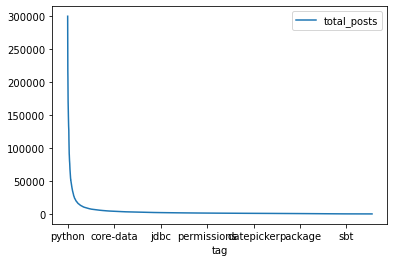

In [ ]:
d1.plot(x="tag",y="total_posts")

<AxesSubplot:xlabel='tag'>

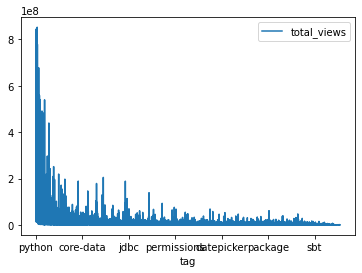

In [ ]:
d2.plot(x="tag")

In [ ]:
#on peut voir que les plus part des questions et recherche sur stack overflow est sur Python

       tag  total_views  year
985     c#    219321759  2008
1289  .net    125766010  2008
1827  java    188996158  2008
AxesSubplot(0.125,0.125;0.775x0.755)
      tag  total_views  year
156    c#    558765042  2009
297  java    484139063  2009
312  .net    234834700  2009
AxesSubplot(0.125,0.125;0.775x0.755)
      tag  total_views  year
90     c#    541925301  2010
124  java    677588568  2010
133   php    366684224  2010
AxesSubplot(0.125,0.125;0.775x0.755)
     tag  total_views  year
53    c#    667835549  2011
60  java    852426360  2011
63   php    444303212  2011
AxesSubplot(0.125,0.125;0.775x0.755)
           tag  total_views  year
34        java    841829669  2012
37          c#    636584720  2012
39  javascript    784399919  2012
AxesSubplot(0.125,0.125;0.775x0.755)
           tag  total_views  year
13  javascript    817022514  2013
15        java    844564268  2013
20         php    447059155  2013
AxesSubplot(0.125,0.125;0.775x0.755)
           tag  total_views  year
4   java

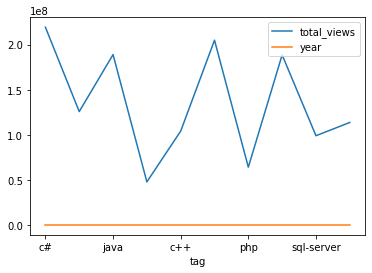

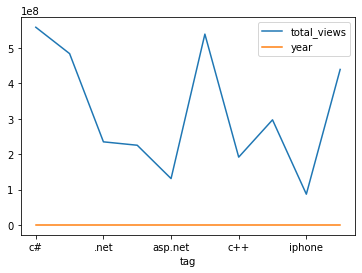

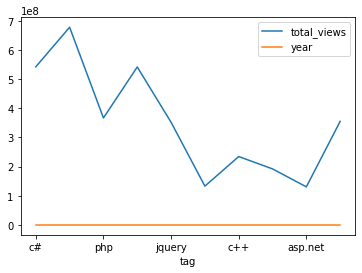

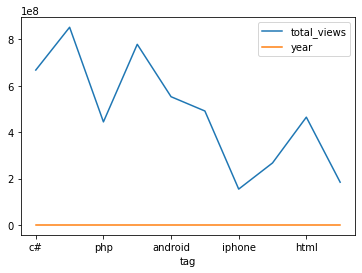

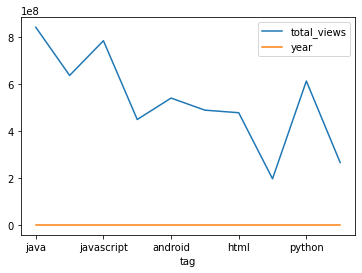

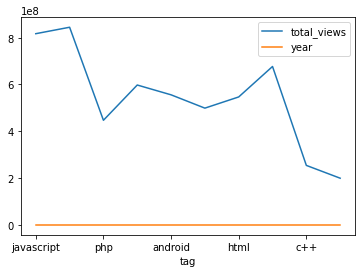

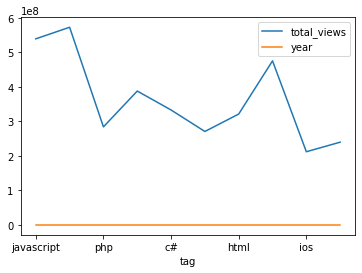

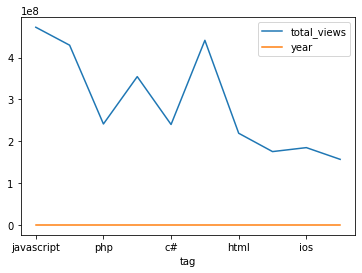

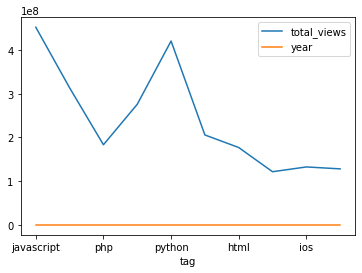

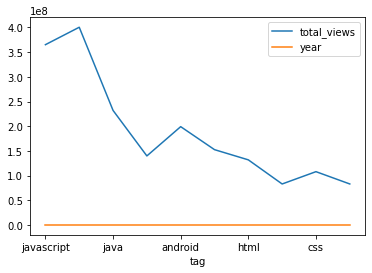

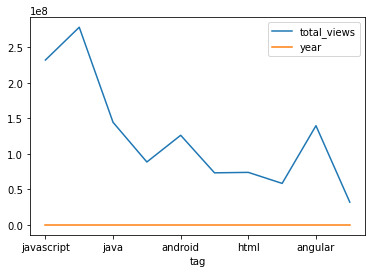

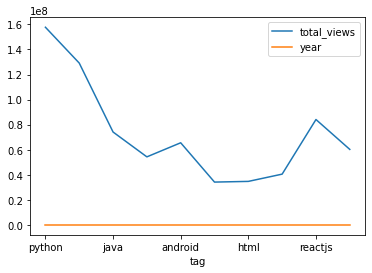

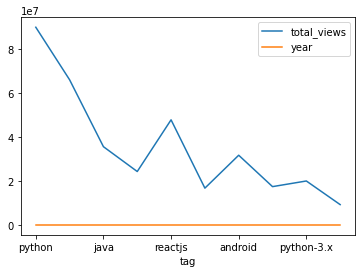

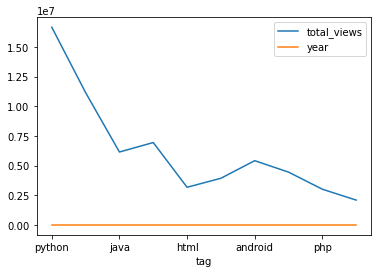

In [ ]:
#dans cette etape on vas faire l'analyse des languages de programmations les plus rechérche pour chaque anné depuis 2008 jusqu'a 2021 top(3)

d3= data[["tag","total_views","year"]].groupby(["year"])

for key,item in d3:
  d4 = d3.get_group(key).head(3)
  print(d4)
  d5=d3.get_group(key).head(10)
  print(d5.plot(x="tag"))
  
    

In [ ]:
data_copy = data[["tag","total_views","year"]].copy()
data_copy

,tag,total_views,year
0,python,90079323,2020
1,javascript,451873786,2016
2,javascript,472718142,2015
3,javascript,365146121,2017
4,javascript,539036428,2014
...,...,...,...
13097,swiftui,2079,2012
13098,visual-studio-2017,100536,2010
13099,powerbi,12310,2012
13100,google-cloud-firestore,74884,2016


In [ ]:
from sklearn.preprocessing import LabelEncoder
#convertir les valeur de colones de chaine de caractaire en valeurs numerique en utilisant LabelEncoder
label = LabelEncoder()
label.fit(data_copy.tag.drop_duplicates())
data_copy.tag = label.transform(data_copy.tag)
data_copy



,tag,total_views,year
0,693,90079323,2020
1,468,451873786,2016
2,468,472718142,2015
3,468,365146121,2017
4,468,539036428,2014
...,...,...,...
13097,839,2079,2012
13098,936,100536,2010
13099,675,12310,2012
13100,368,74884,2016


In [ ]:
Models Training

In [ ]:
#on a separer la colone "year" des autre colone de data_copy
Y = data_copy.total_views
X = data_copy.drop(["total_views"], axis = 1)
X.head()

,tag,year
0,693,2020
1,468,2016
2,468,2015
3,468,2017
4,468,2014


In [ ]:
from sklearn.model_selection import train_test_split

#le paramaitre test_size utilisé pour definir la taille de donné a tester par rapport au model original
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_test,'/n')
print(X_train,'/n')

       tag  year
4347   615  2019
7733   333  2018
3545   777  2012
1237    78  2015
720    521  2013
...    ...   ...
11354  576  2011
6334   124  2010
11828  561  2009
2277   605  2011
4923   489  2015

[4324 rows x 2 columns] /n
       tag  year
3234   854  2020
10720  189  2011
7852   180  2013
12648  648  2008
7516   194  2013
...    ...   ...
11964  484  2020
5191    11  2018
5390   811  2014
860    521  2012
7270    89  2018

[8778 rows x 2 columns] /n


In [ ]:
print(Y_test,'/n')
print(Y_train,'/n')

4347      3011296
7733       724788
3545      7029964
1237     10699426
720      36548078
           ...   
11354     4406766
6334     22353945
11828     5411869
2277      6258529
4923      2012428
Name: total_views, Length: 4324, dtype: int64 /n
3234      1139676
10720     2250892
7852      3862344
12648      448241
7516      2097866
           ...   
11964       15629
5191      1476112
5390      5216992
860      31871430
7270      1146392
Name: total_views, Length: 8778, dtype: int64 /n


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
results = []
lr = LinearRegression()
#ajout des model à entrainer
lr.fit(X_train, Y_train)
#predict va prendre le resultat de la prediction du model a entrainer par rapport au model X utiliser pour tester
predict = lr.predict(X_test)
#comparer les valeur obtenu par rapport au model du test
score = r2_score(Y_test,predict)
print("Le nombre des vue totale prédecté:",predict)
print("le rapport moyen entre les deux resultas",score)

Le nombre des vue totale prédecté: [ 4347843.25228548  6359414.96820068 12452572.38368368 ...
 16724622.77749395 14156377.2378006   9590653.7930212 ]
le rapport moyen entre les deux resultas 0.018430945027091417


In [ ]:

print('Comparaison')
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression


Comparaison


,Actual,Predicted
4347,3011296,4.347843e+06
7733,724788,6.359415e+06
3545,7029964,1.245257e+07
1237,10699426,1.074058e+07
720,36548078,1.194626e+07
...,...,...
11354,4406766,1.423752e+07
6334,22353945,1.672473e+07
11828,5411869,1.672462e+07
2277,6258529,1.415638e+07
